In [11]:
import json
import os
results=[]
fileNr=1
while True:
    try:
        with open('data/results'+str(fileNr)+'.json', 'r') as file:
            results += json.load(file)
        fileNr+=1
    except FileNotFoundError:
        break
    
for result in results:
    result['chars']=result['prefixSize']+result['suffixSize']
    result['match']=1 if result['match'] else 0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)


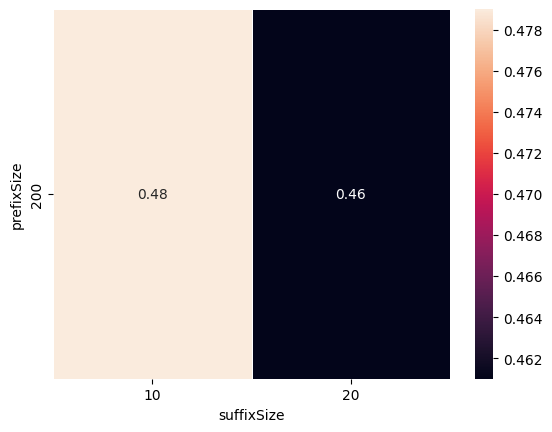

In [13]:
pivoted=pd.pivot_table(df,index='prefixSize', columns='suffixSize',values='match')
sns.heatmap(pivoted, annot=True, linewidths=.5)
plt.show()


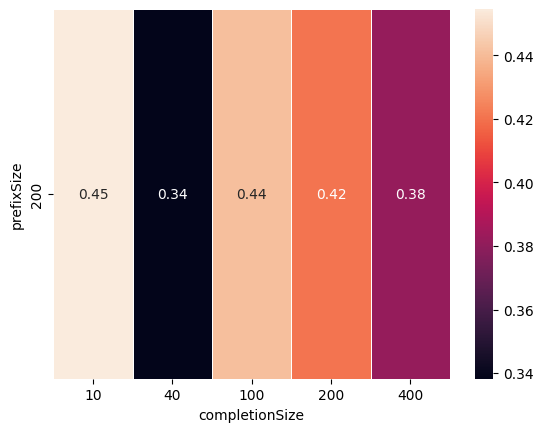

In [14]:

pivoted=pd.pivot_table(df.query("category=='beginningOfWord' & prefixSize==200"),index='prefixSize', columns='completionSize',values='match')
sns.heatmap(pivoted, annot=True, linewidths=.5)
plt.show()

                                                          mean              \
                                                         match      timeMs   
prefixSize suffixSize completionSize category                                
200        10         10             beginningOfWord  0.486726  271.707965   
                                     random           0.586538  257.951923   
                      40             beginningOfWord  0.367925  295.754717   
                                     random           0.462963  288.805556   
                      100            beginningOfWord  0.440860  313.397849   
                                     random           0.613861  291.346535   
                      200            beginningOfWord  0.424528  297.896226   
                                     random           0.552941  303.905882   
                      400            beginningOfWord  0.376344  306.666667   
                                     random           0.483516  

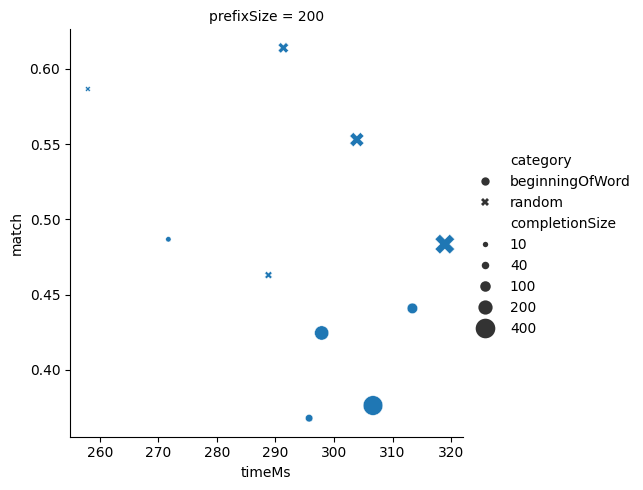

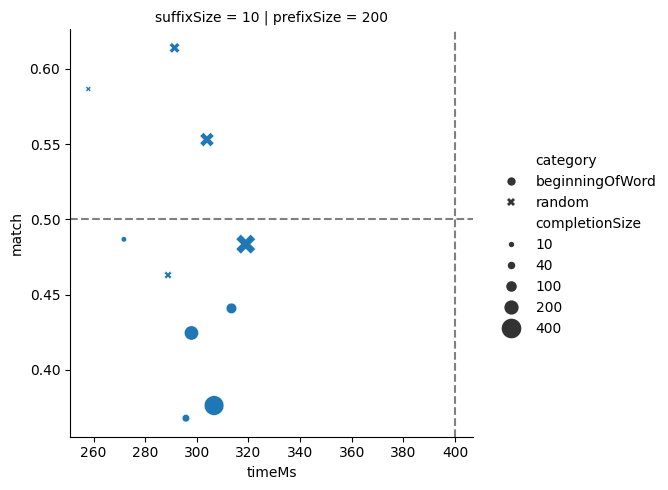

In [15]:
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord' & completionSize==200"),index=['prefixSize','suffixSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query(" completionSize==10"),index=['prefixSize','suffixSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord'"),index=['prefixSize','suffixSize','completionSize'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df.query("category=='beginningOfWord' & prefixSize==200"),index=['prefixSize','suffixSize','completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
pivoted=pd.pivot_table(df.query("suffixSize!=20"),index=['prefixSize','suffixSize','completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df,index=['completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
# pivoted=pd.pivot_table(df,index=['prefixSize','suffixSize','category'], values=['match','timeMs'])

print(pivoted)
# sns.relplot(data=pivoted['mean'], x='timeMs', y='match',style='category')
sns.relplot(data=pivoted['mean'], x='timeMs', y='match',col='prefixSize',style='category',size='completionSize',sizes=(15, 200))
plt.show()

g=sns.relplot(data=pivoted['mean'], x='timeMs', y='match',col='prefixSize', row='suffixSize',size='completionSize',style='category',sizes=(15, 200))
g.refline(x=400)
g.refline(y=0.5)
# foo=g.axes[0][0]
# foo.axvline(x=400, ls=':')
# foo.set_xlim(200,400)
# foo.set_ylim(0.4,0.6)
plt.show()

                                                          mean              \
                                                         match      timeMs   
prefixSize suffixSize completionSize category                                
200        10         10             beginningOfWord  0.486726  271.707965   
                                     random           0.586538  257.951923   
                      40             beginningOfWord  0.367925  295.754717   
                                     random           0.462963  288.805556   
                      100            beginningOfWord  0.440860  313.397849   
                                     random           0.613861  291.346535   
                      200            beginningOfWord  0.424528  297.896226   
                                     random           0.552941  303.905882   
                      400            beginningOfWord  0.376344  306.666667   
                                     random           0.483516  

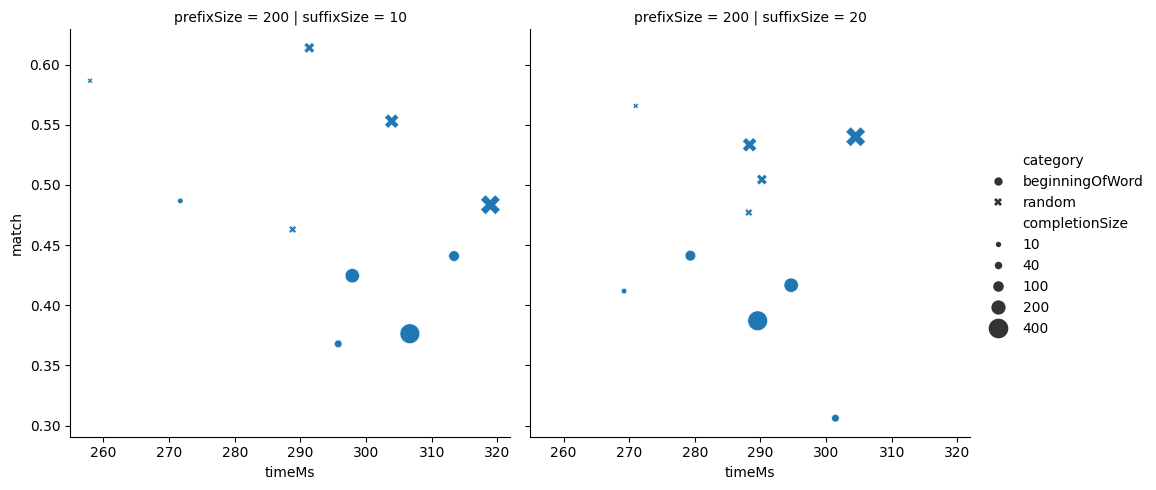

In [16]:
pivoted=pd.pivot_table(df.query('prefixSize==200 & (suffixSize==10 | suffixSize==20)'),index=['prefixSize','suffixSize','completionSize','category'], values=['match','timeMs'], aggfunc=['mean','count'])
print(pivoted)
sns.relplot(data=pivoted['mean'], x='timeMs', y='match',col='suffixSize', row='prefixSize',style='category',size='completionSize',sizes=(15, 200))
plt.show()

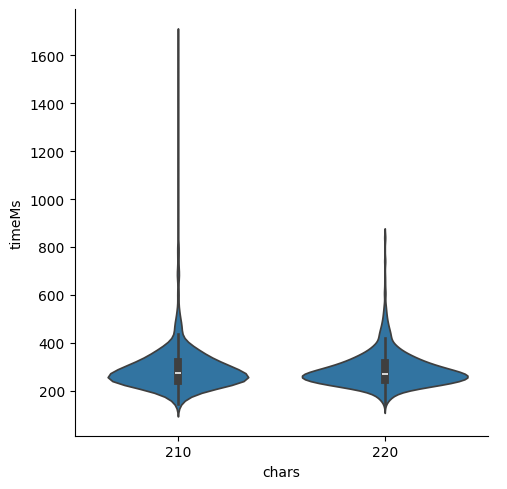

In [17]:
sns.catplot(data=df, x='chars', y='timeMs',kind="violin")

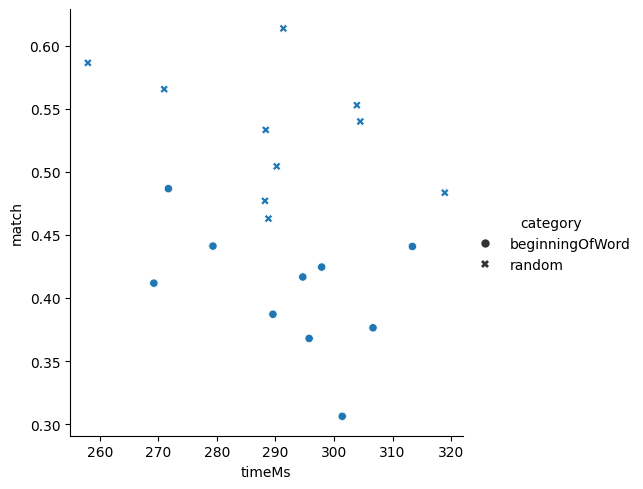

In [18]:
sns.relplot(data=pivoted['mean'], x='timeMs', y='match',style='category')
plt.show()

            match   timeMs
prefixSize                
200          0.47  290.744


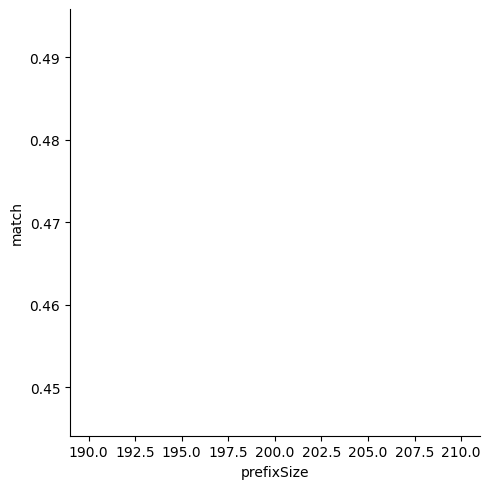

In [19]:
pivoted=pd.pivot_table(df,index=['prefixSize'], values=['match','timeMs'])
plt.show()
print(pivoted)
sns.relplot(data=pivoted, x='prefixSize', y='match', kind='line')
plt.show()

            match   timeMs
suffixSize                
10          0.479  293.595
20          0.461  287.893


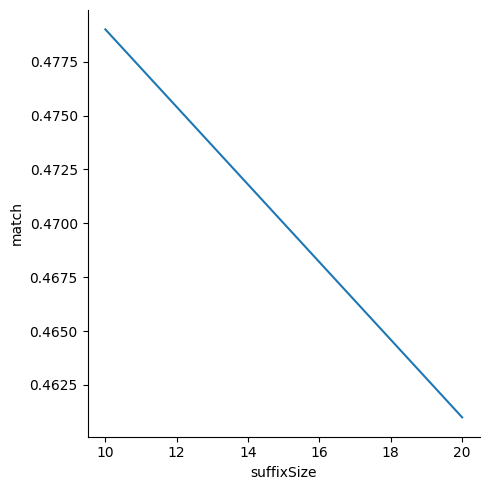

In [20]:
pivoted=pd.pivot_table(df,index=['suffixSize'], values=['match','timeMs'])
plt.show()
print(pivoted)
sns.relplot(data=pivoted, x='suffixSize', y='match', kind='line')
plt.show()